In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from BinaryClassifier import BinaryClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
%matplotlib inline

In [268]:
# Configuration

dataset_name = 'debian_random'
test_size = 0.25

params_space = {
    'C': [10**x for x in range(1, 11)]
}

bc = BinaryClassifier(
    use_regexes=True,
    penalty='l1',
)

gs = GridSearchCV(
    bc,
    params_space,
    cv=10,
    n_jobs=-1,
    verbose=1,
    scoring='f1_macro'
)

In [269]:
csv_file = 'dataset/{}.csv'.format(dataset_name)
X, y = bc.parse_training_data(IN_FILE)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

In [270]:
gs.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   40.2s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=BinaryClassifier(C=10000, max_size=None, min_size=1, n_jobs=1, penalty='l1',
         use_regexes=True),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': [10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000, 10000000000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1_macro', verbose=1)

In [271]:
cv_df = pd.DataFrame(gs.cv_results_)
cv_df.sort_values(by='rank_test_score')

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
3       1.678281         0.003297         0.995234          1.000000   
2       1.925098         0.003444         0.994761          1.000000   
1       2.024038         0.003432         0.994365          0.999853   
0       1.079656         0.006802         0.990945          0.994714   
4       1.351100         0.003476         0.989966          1.000000   
8       1.422276         0.004209         0.989541          1.000000   
9       1.406542         0.003406         0.989101          1.000000   
6       1.628035         0.003310         0.989081          1.000000   
5       1.678939         0.007059         0.988658          1.000000   
7       1.348877         0.003513         0.988218          1.000000   

       param_C              params  rank_test_score  split0_test_score  \
3        10000        {'C': 10000}                1           0.987058   
2         1000         {'C': 1000}                2           0.982821   
1          100          {'C': 100}                3           0.982965   
0           10           {'C': 10}                4           0.982965   
4       100000       {'C': 100000}                5           0.987058   
8   1000000000   {'C': 1000000000}                6           0.987058   
9  10000000000  {'C': 10000000000}                7           0.987058   
6     10000000     {'C': 10000000}                8           0.987058   
5      1000000      {'C': 1000000}                9           0.987058   
7    100000000    {'C': 100000000}               10           0.982658   

   split0_train_score  split1_test_score       ...         split7_test_score  \
3            1.000000           1.000000       ...                  0.986982   
2            1.000000           1.000000       ...                  0.991224   
1            1.000000           0.995609       ...                  0.991224   
0            0.994695           0.995609       ...                  0.978434   
4            1.000000           0.991225       ...                  0.978358   
8            1.000000           0.991225       ...                  0.978358   
9            1.000000           0.986842       ...                  0.978358   
6            1.000000           0.986826       ...                  0.978358   
5            1.000000           0.986842       ...                  0.978358   
7            1.000000           0.982451       ...                  0.978358   

   split7_train_score  split8_test_score  split8_train_score  \
3             1.00000           1.000000            1.000000   
2             1.00000           1.000000            1.000000   
1             0.99951           1.000000            1.000000   
0             0.99471           0.991350            0.995207   
4             1.00000           0.995523            1.000000   
8             1.00000           0.995523            1.000000   
9             1.00000           0.995523            1.000000   
6             1.00000           0.995523            1.000000   
5             1.00000           0.995523            1.000000   
7             1.00000           0.995523            1.000000   

   split9_test_score  split9_train_score  std_fit_time  std_score_time  \
3           1.000000            1.000000      0.228984        0.000271   
2           1.000000            1.000000      0.285502        0.000680   
1           1.000000            0.999511      0.376564        0.000552   
0           0.995534            0.993766      0.079663        0.003585   
4           0.991071            1.000000      0.125897        0.000841   
8           0.991071            1.000000      0.111699        0.002656   
9           0.991071            1.000000      0.072508        0.001027   
6           0.991071            1.000000      0.090122        0.000230   
5           0.991071            1.000000      0.121171        0.003971   
7           0.991071            1.000000      0.130207        0.00046

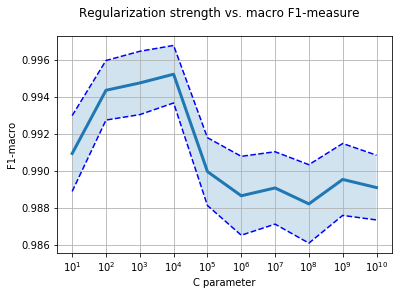

In [272]:
import matplotlib.ticker

c_params = cv_df['param_C'].values.astype('float')
scores = cv_df['mean_test_score'].values
scores_std = cv_df['std_test_score'].values

fig, ax = plt.subplots()
fig.suptitle('Regularization strength vs. macro F1-measure')

ax.semilogx(c_params, scores, linewidth=3.0)
# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(gs.cv)

ax.semilogx(c_params, scores + std_error, 'b--')
ax.semilogx(c_params, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
ax.fill_between(c_params, scores + std_error, scores - std_error, alpha=0.2)

ax.xaxis.set_major_locator(matplotlib.ticker.LogLocator(numticks=20))
ax.minorticks_off()
ax.set_xlabel('C parameter')
ax.set_ylabel('F1-macro')
ax.grid()
fig.savefig('figures/hyperparam_{}.pdf'.format(dataset_name))

In [273]:
params = gs.best_params_
C_best = params['C']
params

{'C': 10000}

In [274]:
# Test on remaining data
report, confusion_matrix = gs.best_estimator_.evaluate_test(X_test, y_test)
print(report)

             precision    recall  f1-score   support

      amd64      0.989     1.000     0.994        86
      arm64      1.000     1.000     1.000       102
      armel      1.000     1.000     1.000        96
      armhf      1.000     1.000     1.000        84
       i386      1.000     0.990     0.995        97
       mips      0.989     1.000     0.995        94
     mipsel      1.000     0.991     0.995       106
    ppc64el      1.000     1.000     1.000       103

avg / total      0.997     0.997     0.997       768

